In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/finance_course/2021/lesson9')

Mounted at /content/drive


# Machine Learning

## Neural Network Definition
* Artificial Neural Networks (ANN or simply NN) are information processing models that are developed by inspiring from the working principles of human brain. 
  * Their most essential property is the ability of learning from sample sets. 

* The basic unit of ANN architecture are neurons which are internally in connection with other neurons. 

![Model of an artificial neuron.](https://drive.google.com/uc?id=1sT_uKTvHpG4KJqBICnhYlimAz7UIagsk)

* A neuron consists of:
  * weights ($w_i$) 
  * real numbers ($x_i$). 
  
$$ \textrm{Inputs} = \sum_{i=1}^{N} x_i w_i +w_0 = \Sigma \rightarrow = f(\Sigma) \rightarrow \textrm{Output}$$  

* There are many different types of activation function
  * *step function* which returns just 0 or 1 according to the input value 
  * *sigmoid* which can be thought of as the continuous version of the step function)
  * rectified Linear Unit (ReLU) 
  * hyperbolic tangent (tanh).

<img src="https://drive.google.com/uc?id=1yPgenOKBcnH3B_F1jx1Q6T1Bc249n9ya" width=500>

## Supervised Training of a Neuron

* Inputs from a *training* set are presented to the neuron one after the other together with the correct output and the neuron weights are modified accordingly.

* When an entire pass through all of the input training vectors is completed (*epoch*) the neuron has learnt. 
  * Actually we can present many times the same set to the neuron to make it learn better.

* When the training is completed:
  * a input vector $\mathbf{x}$ already in the training set will output the correct value
  * $\mathbf{x}$ not in the training set, the network will respond with an output similar to other training vectors close to $\mathbf{x}$.

* This kind of training is called *supervised* because we have a set of training data with known targets and we want our model to learn to predict the target from the other variables. 

* Using just a neuron is a too simple architecture. The next step is to put together more neurons in *layers*.

### Multilayered Neural Networks

![A multilayered neural network.](https://drive.google.com/uc?id=1_D3eO0Bb5XwF9SIFbEvsMNNbz_hI3EuX)

* In a multilayered NN each neuron from the *input layer* is fed up to each neuron in the next hidden layer, and from there to each neuron on the output layer. 
  * There can be any number of neurons per layer.

### Training a Multilayered Neural Network

* The training of a multilayered NN follows these steps:
  1. present a training sample to the neural network (initialized with random weights $w_i$);
  2. compute the network output obtained by calculating activations of each layer;
  3. calculate the error (loss) as the difference between the NN predicted output and the target output;
  4. re-adjust the weights of the network such that the difference with the target decreases;
  5. continue the process for all samples several times (epochs).

<img src="https://drive.google.com/uc?id=1M38qS_oDvO45sOA894UqMTyw50K2o5zS">

* The NN error is computed by the *loss function*. Different loss functions will give different errors for the same prediction, with a considerable effect on the performance of the model. 

* Two are the main possible choices
  * Mean Absolute Error (MAE): the average of the absolute value of the differences between the predictions and true values. It represents how far off we are on average from the correct value;
  * Root Mean Squared Error (MSE): the square root of the average of the squared differences between the predictions and true values. It penalizes larger errors more heavily and is commonly used in regression tasks. 
* Either metrics may be appropriate depending on the situation and you can use both for comparison. 

* For accurate predictions, one needs to minimize the calculated error as a function of the network weights.
* This is done using *back propagation*. 
  * The current error is typically propagated backwards to previous layers, where it is used to modify the weights so that the error is minimized.

<img src="https://drive.google.com/uc?id=1NQFCPJomQQD4l1KcK-7iBTLxDkE8DpiG">

* Weights are modified using a function called *Optimization Function* (we will use *Adam* as optimizator in the following but there are more).

## Regression and Classification

### Classification 
* Is the process of finding a function to split the dataset into classes based on different parameters. 
  * The goal is to find the mapping function between the input and the **discrete** output($y$).

* Email spam detection: the model is trained on the basis of millions of emails on different parameters, and whenever it receives a new email, it identifies whether the email is spam or not.
* Classification algorithms can also be in speech recognition, car plates identification, etc.

### Regression
* Is the process of finding the correlations between dependent and independent variables. 
  * It helps in predicting the continuous variables such as prediction of market trends, house prices, etc.

* The goal is to find the mapping function to map the input variable to the **continuous** output variable.

* Weather forecasting; the model is trained on past data, and once the training is completed, it can predict the weather for future days.
  * In general whenever we are dealing with function approximation this kind of algorithms can be applied. 	

### Technical Note

* Neural network training and testing is performed using $\tt{keras}$ (which is based on a Google opensource library called $\tt{tensorflow}$) and $\tt{scikit-learn}$ which provide many useful utilitites for the training.

## Function approximation 

* Let's design an ANN which is capable of learning the functional form underlying a set of data.

* Generate a sample with $x$ (input), $f(x)$ (target output) pairs where $f(x) = x^3 +2$.

In [ ]:
# define the dataset
import numpy as np

X = np.array([(x, x**3+2) for x in np.arange(-2, 2.001, 0.001)])
print("Distribution of original data ", X[:, 0].min(), X[:, 0].max(), 
                                        X[:, 1].min(), X[:, 1].max())

Distribution of original data  -2.0 1.9999999999995595 -6.0 9.999999999994714


* Apply a simple transformation on the sample to have all the inputs with uniform scales. 
* This is done to provide the NN with *normalized* data, infact it can be fooled by very large or very small numbers giving unstable results.

* **StandardScaler**: scales features such that the distribution is centered around 0, with a standard deviation of 1. It is not quite good if data is not normally distributed;
* **MinMaxScaler**: shrinks the range such that it becomes between 0 and 1 (or -1 to 1 if there are negative values in the first place). It can be influenced heavily by outliers;
* **RobustScaler**: similar to the previous one but it instead uses quantile ranges, so that it is robust against outliers.

<img src="https://drive.google.com/uc?id=1qpi6AdwweZywfSrsMSbgNsZGqSz1DLI3">

In [ ]:
# normalize data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scale.fit_transform(X)

print("The same data after the normalization ", X_scaled[:, 0].min(), X_scaled[:, 0].max(), 
                                                X_scaled[:, 1].min(), X_scaled[:, 1].max())

X_train, X_test = train_test_split(X_scaled, test_size=0.2)

The same data after the normalization  -1.0 1.0 -1.0 1.0


### Neural Network Design

* There is no rule to guide developers into the design of a neural network in terms of number of layers and neuron per layer. 
* The most common strategy is *trial and error* where you pick up the solution giving the best accuracy. 
  * In general a larger number of nodes is better to catch highly structured data with a lot of feature although it may require larger training sample to work correctly.
  * **As a rule of thumb a NN with just one hidden layer with a number of neurons averaging the inputs and outputs is sufficient in most cases.** 


* Let's use two layers with 15 and 5 neurons and a *tanh* activation function. 
* The $\tt{inputs}$ parameter has to be set to 1 since we have just one single input, the $x$ value. 

<img src="https://drive.google.com/uc?id=1VBb5EA8dX9ZeAGD_EkUvbv0pkBXv_TID">

In [ ]:
# design the neural network model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(15, input_dim=1, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train[:, 0], X_train[:, 1], epochs=100, verbose=1)

Epoch 1/100
100/100 [==============================] - 1s 1ms/step - loss: 0.0906
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0297
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 13/100


* After the training is completed we can evaluate how good it is. 
  * **Usually performance are measured using the loss function value at the end of the training.**
  * a *perfect* prediction would lead to a loss = 0 so the lower this number the better the agreement. 

* The picture below are shown the actual function we want to approximate and different predictions of our NN obtained with four epoch numbers (5, 100, 800, 5000).

<img src="https://drive.google.com/uc?id=1oWfQq6q7PVzrZ979FS_weAJUj3cL7AOu">

* The agreement improves with higher number of epochs which means that the NN has more opportunities to adapt the weights and reduce the loss to the target values. 

### Overfitting (Overtraining)

* Increasing too much the number of epochs may lead to overfitting: 
  * the NN learns too well the training sample but its performance degrade substantially in an independent sample. 
* It is required to split the available sample in two parts: training and testing (e.g. 80% and 20%) 
  * **training** to perform the setting of the weights;
  * **testing** to cross-check the performance in an independent sample. 

* To check if this is the case we can *evaluate* our NN with both the training ad the testing samples. 
  * If the losses are comparable the NN is ok otherwise if the training losses are much smaller than the testing we had overfitting.
  * In this second case if we need more accuracy we need to either increase the training sample or to change the NN design.







In [ ]:
eval1 = model.evaluate(X_train[:, 0], X_train[:, 1])
print('Training: {}'.format(eval1))
    
eval2 = model.evaluate(X_test[:, 0], X_test[:, 1])
print('Test: {}'.format(eval2))

100/100 [==============================] - 0s 1ms/step - loss: 9.9672e-06
Training: 9.967201549443416e-06
26/26 [==============================] - 0s 2ms/step - loss: 1.1507e-05
Test: 1.1506813279993366e-05


## A Feature Not a Bug

* If you ran the previous example you would most likely obtain different results.
  * **This is not a bug but a feature of NN**, let's see which are the possible sources for such discrepancies.

* **Stochastic learning algorithm**: NN algorithm is stochastic i.e. its behaviour incorporates elements of randomness (beware that stochastic
does not mean learning a random model). 
* Their randomness comes from: 
  * the *random initial weights*, which allow the model to try learning from a different starting point in the search space each time; 
  * the *random shuffle of examples during training*, which ensures that each gradient estimate and weight update is slightly different. 

* The impact is that each time it is run on the same data, it learns a slightly different model and when evaluated, may have a slightly different performance. 

* You can control randomness by setting the seed used by the pseudorandom number generator: although this is not a good approach in practice.
  * There is no best seed for any algorithm 
  * you need to summarize the performance by fitting multiple times a model on your dataset and averaging its predictions.



### Black-Scholes Call Options

* We will create a neural network capable of approximate the Black-Scholes pricing formula

$$P_\textrm{call} = F_\textrm{BS}(S_0, K, r, \sigma, \mathrm{ttm})$$

* This example is not as silly as it may seem at first sight.
  * We know Black-Scholes formula is just an approximation so using a NN to model the option price as a function of $(S_0, K, r, \sigma, \mathrm{ttm})$ **may catch additional terms not arising from the original BS model** (of course if the training set is made of market data) e.g.

  $$P^\textrm{real}_{\textrm{call}} = S_0 N(d_1)−Ke^{−rt} N(d_2) + f(S_0, K, r, \sigma, \mathrm{ttm})$$

* Generate the training sample made of a grid of volatility-rate pairs $(\sigma, r)$ 
  * for simplicity we are going to set moneyness and time to maturity to 1. 
* Target values are the call prices computed using BS.

In [ ]:
# create sample
import pandas as pd
import numpy as np
from finmarkets import call_m

data = []
for r in np.arange(0.01, 0.11, 0.001):
    for sigma in np.arange(0.1, 0.6, 0.005):
        temp = {'rate':r, 'vol':sigma, 'price':call_m(1, sigma, r, 1)}
        data.append(temp)

df = pd.DataFrame(data)
df.to_csv("bs_training_sample.csv")

In [ ]:
# read sample
import pandas as pd
from finmarkets import call_m

data =  pd.read_csv("/content/drive/MyDrive/finance_course/2021/lesson9/bs_training_sample.csv")

* Since it takes some time to generate data samples, it is always advisable to save them in a file since we may need to load it many times during the NN development.

In [ ]:
# describe the sample
print (df.describe())

               rate           vol         price
count  10000.000000  10000.000000  10000.000000
mean       0.059500      0.347500      0.165274
std        0.028868      0.144338      0.055387
min        0.010000      0.100000      0.044852
25%        0.034750      0.223750      0.119389
50%        0.059500      0.347500      0.165476
75%        0.084250      0.471250      0.212097
max        0.109000      0.595000      0.277071


* *Normalize* data to get better results. **Beware that this time we have TWO input parameters (rate and volatilty)** and not just one.

In [ ]:
# normalize sample

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scale_X = MinMaxScaler()
scale_Y = MinMaxScaler()

X_scaled = scale_X.fit_transform(df[['vol', 'rate']])
Y_scaled = scale_Y.fit_transform(df[['price']])

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2)

<img src="https://drive.google.com/uc?id=1A2V-aoDNYYAIO-SNHvthoay3Ixj6J8Zq">

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, Y_train, epochs=1500, verbose=1)

Epoch 1/1500
250/250 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 2/1500
250/250 [==============================] - 0s 1ms/step - loss: 1.6816e-05
Epoch 3/1500
250/250 [==============================] - 0s 1ms/step - loss: 1.1562e-05
Epoch 4/1500
250/250 [==============================] - 0s 1ms/step - loss: 9.7104e-06
Epoch 5/1500
250/250 [==============================] - 0s 1ms/step - loss: 7.9107e-06
Epoch 6/1500
250/250 [==============================] - 0s 1ms/step - loss: 6.3827e-06
Epoch 7/1500
250/250 [==============================] - 0s 1ms/step - loss: 5.5079e-06
Epoch 8/1500
250/250 [==============================] - 0s 1ms/step - loss: 4.8717e-06
Epoch 9/1500
250/250 [==============================] - 0s 1ms/step - loss: 4.4154e-06
Epoch 10/1500
250/250 [==============================] - 0s 1ms/step - loss: 4.0199e-06
Epoch 11/1500
250/250 [==============================] - 0s 1ms/step - loss: 4.0869e-06
Epoch 12/1500
250/250 [======================

In [ ]:
eval1 = model.evaluate(X_train, Y_train)
print('Training: {}'.format(eval1))
    
eval2 = model.evaluate(X_test, Y_test)
print('Test: {}'.format(eval2))

import joblib

job_name = 'bs_model'
model.save(job_name)
joblib.dump(scale_X, job_name + "_x_scaler.save")
joblib.dump(scale_Y, job_name + "_y_scaler.save")

250/250 [==============================] - 0s 1ms/step - loss: 2.2764e-07
Training: 2.276427437664097e-07
63/63 [==============================] - 0s 2ms/step - loss: 2.2441e-07
Test: 2.2440976010784652e-07
INFO:tensorflow:Assets written to: bs_model/assets


['bs_model_y_scaler.save']

<table>
<tr>
<td><img src="https://drive.google.com/uc?id=19nWO2yapXk_VcyBp3yVyw0eZjh08AhRN"></td>
<td><img src="https://drive.google.com/uc?id=1omtdN9W0uzznp9fRMuVtMTmEWmXQ7ITk"></td>
</tr>
</table>
<img src="https://drive.google.com/uc?id=1fqqWFp_1_HDkKs_csKPCeIAuRw5CDxhN" width=400>

* Let's say we want to know the price of a call when the interest rate is 0.015 and the volatility 0.234:

In [ ]:
import numpy as np
from finmarkets import call_m
from keras.models import load_model

# here we load the trained model
model = load_model(job_name)
scale_X = joblib.load(job_name + "_x_scaler.save")
scale_Y = joblib.load(job_name + "_y_scaler.save")

vr = np.array([[0.234, 0.015]])
X = scale_X.transform(vr)
prediction = scale_Y.inverse_transform(model.predict(X))[0][0]
call_price = call_m(1, vr[0][0], vr[0][1], 1)

print ('{} => {:.4f} (expected {:.4f})'.format(vr.tolist(), prediction, call_price))

[[0.234, 0.015]] => 0.1000 (expected 0.1001)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


* **NN cannot extrapolate**. If you try to predict the price of a call from rate and volatility with values that aren't in the ranges used in the training, say $r = 0.22$ and $\sigma = 0.01$...

In [ ]:
vr = np.array([[0.01, 0.22]])
X = scale_X.transform(vr)
prediction = scale_Y.inverse_transform(model.predict(X))[0][0]
call_price = call_m(1, vr[0][0], vr[0][1], 1)

print ('{} => {:.4f} (expected {:.4f})'.format(vr.tolist(), prediction, call_price))

[[0.01, 0.22]] => 0.1610 (expected 0.1975)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## Model Calibration

* A very useful application of NN regression is *model calibration* which consists of deriving parameters of a model directly from market values.
  * especially convenient to estimate parameters (e.g. volatility) which are otherwise complicated to compute.

### Historical vs. Implied Volatility

* *Historical volatility* is the realized volatility of an asset over a previous time period. 
  * It is determined by measuring the standard deviation of its price during that time period.
  * Volatility shifts as market goes through different regimes. Thus, historical volatility may not be an accurate measure of future volatility. 

* *Implied volatility* is the expected future volatility of the asset that is implied by the price of the stock's options. 
  * It can be derived from the price of an option (e.g. inverting the Black and Scholes formula).
  * Implied volatility looks toward the future by taking into account all the information used by market participants to determine prices in the options market, instead of just past prices.
  
* Assume we need to estimate the *implied volatilty* of a stock in real time. 
* A NN can be trained on a list of calls with inputs: price, moneyness, rate and time to maturity and target output the underlying volatility.
  * We are approximating 
$$ \sigma = F^{-1}_\textrm{BS}(P_\textrm{call}, S_0, K, r, \mathrm{ttm})\\[5pt]$$
  * The model calibration happens when we predict the asset volatility with the trained NN using as input the real market price of the option.


* The training sample created before can be re-used (again we set $\mathrm{ttm}=1$ and $K=1$). 
* It is enough to swap dataframe columns in input (pairs of rate and price) and output (the volatility).

In [ ]:
import pandas as pd

df =  pd.read_csv("/content/drive/MyDrive/finance_course/2021/lesson9/bs_training_sample.csv")

scale_X = MinMaxScaler()
scale_Y = MinMaxScaler()

X_scaled = scale_X.fit_transform(df[['rate', 'price']])
Y_scaled = scale_Y.fit_transform(df[['vol']])

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, Y_train, epochs=1500, verbose=1)

Epoch 1/1500
250/250 [==============================] - 1s 1ms/step - loss: 0.0557
Epoch 2/1500
250/250 [==============================] - 0s 1ms/step - loss: 1.6132e-04
Epoch 3/1500
250/250 [==============================] - 0s 1ms/step - loss: 9.7597e-05
Epoch 4/1500
250/250 [==============================] - 0s 1ms/step - loss: 8.6207e-05
Epoch 5/1500
250/250 [==============================] - 0s 1ms/step - loss: 7.4325e-05
Epoch 6/1500
250/250 [==============================] - 0s 1ms/step - loss: 5.5176e-05
Epoch 7/1500
250/250 [==============================] - 0s 1ms/step - loss: 4.1682e-05
Epoch 8/1500
250/250 [==============================] - 0s 1ms/step - loss: 3.2919e-05
Epoch 9/1500
250/250 [==============================] - 0s 1ms/step - loss: 2.6697e-05
Epoch 10/1500
250/250 [==============================] - 0s 1ms/step - loss: 2.2259e-05
Epoch 11/1500
250/250 [==============================] - 0s 1ms/step - loss: 2.0309e-05
Epoch 12/1500
250/250 [======================

In [ ]:
eval1 = model.evaluate(X_train, Y_train)
print('Training: {}'.format(eval1))
    
eval2 = model.evaluate(X_test, Y_test)
print('Test: {}'.format(eval2))

job_name = 'calibration_model'
model.save(job_name)
joblib.dump(scale_X, job_name + "_x_scaler.save")
joblib.dump(scale_Y, job_name + "_y_scaler.save")

250/250 [==============================] - 0s 1ms/step - loss: 3.2296e-07
Training: 3.229554863537487e-07
63/63 [==============================] - 0s 2ms/step - loss: 3.6320e-07
Test: 3.632026164268609e-07
INFO:tensorflow:Assets written to: calibration_model/assets


['calibration_model_y_scaler.save']

* Provided our training sample includes the correct range of call market prices we can easily estimate the implied volatility. 
* For example if the risk-free rate is 2% and the current price is 0.15.

In [ ]:
job_name = 'calibration_model'
model = load_model(job_name)
scale_X = joblib.load(job_name + "_x_scaler.save")
scale_Y = joblib.load(job_name + "_y_scaler.save")

rp = np.array([[0.02, 0.15]])
prediction = model.predict(scale_X.transform(rp))
volatility = scale_Y.inverse_transform(prediction)[0][0]

print ('{} => {:.4f} (expected call price {:.4f})'.format(rp.tolist(), 
                                                          volatility, 
                                                          call_m(1, volatility, 0.02, 1)))

[[0.02, 0.15]] => 0.3560 (expected call price 0.1500)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## Bankruptcy Prediction

* A company faces bankruptcy when it is unable to pay off its debts. 
* The Taiwan Economic Journal for the years 1999 to 2009 has listed the details of company bankruptcy. 
  * Data includes 94 numerical attributes that help understand the possibility of bankruptcy.

* The goal is to analyze the possibility an organization would face it. 
* Beside the actual classification problem a couple of more concepts are involved here:
  * **imbalanced dataset**: a situation when there is an unequal population of each class in the dataset;
  * **finding the best attributes** to work with through feature selection.

* input dataset: [bankruptcy_data.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/bankruptcy_data.csv)


In [ ]:
import pandas as pd

data = pd.read_csv("bankruptcy_data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207

* Given the very large number of available features remove those which present high correlation with other features.

* Numerically compute the feature correlation and define a threshold (e.g.  $|\rho|\geq 0.95$) to remove the attributes above this value.

In [ ]:
corr_mat = data.corr()
corr_mat = corr_mat.iloc[1:, 1:]

drop_list = {}
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) >= 0.95:
            if corr_mat.columns[j] not in drop_list:
                drop_list.setdefault(corr_mat.columns[j], []).append(corr_mat.columns[i])
                
for d in drop_list:
    print (d)

ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax
Operating Gross Margin
Pre-tax net Interest Rate
After-tax net Interest Rate
Net Value Per Share (B)
Net Value Per Share (A)
Persistent EPS in the Last Four Seasons
After-tax Net Profit Growth Rate
Debt ratio %
Operating Profit Per Share (Yuan ¥)
Per Share Net profit before tax (Yuan ¥)
Current Liabilities/Liability
Current Liabilities/Equity
Realized Sales Gross Margin
Borrowing dependency
Current Liability to Equity


* These 17 attributes have correlation above threashold therefore they do not bring additional discrimination power to the network so can be safely discarded.

In [ ]:
data = data.drop(drop_list, axis=1) 
y = data['Bankrupt?'] 
X = data.drop(['Bankrupt?'], axis=1)

## Unbalanced Dataset

In [ ]:
print (data['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


* The dataset is highly imbalanced:
  * the main problem with imbalanced classification is there are too few examples of the minority class for a model to effectively learn the decision boundary. 
  
* Reduce the problem by *oversampling* the dataset with the Synthetic Minority Oversampling Technique (SMOT). 
  * SMOT works by selecting examples that are "close" in the feature space, specifically:
    1. a random example from the minority class is chosen;
    2. then $k$ of the nearest neighbors for that example are found; 
    3. a randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

<img src="https://drive.google.com/uc?id=1Wu5o-3nzpstP4KNRTg9jEeMKvmhi1vvB">

* The approach is effective because new synthetic examples of the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.
  * A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

* In $\tt{python}$ SMOT algorithm is implemented in $\tt{imblearn.over\_sampling}$ module.



In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

* The last preparation step is dataset normalization which is necessary since each column values range very differently.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)

* Now we can define the neural network architecture and go on with the training.

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(77, input_dim=len(X_sm), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(77, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min', 
                           verbose=1, 
                           patience=50)

model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop])

Epoch 1/600
330/330 [==============================] - 1s 3ms/step - loss: 0.3302 - val_loss: 0.2250
Epoch 2/600
330/330 [==============================] - 1s 2ms/step - loss: 0.2383 - val_loss: 0.1791
Epoch 3/600
330/330 [==============================] - 1s 2ms/step - loss: 0.1952 - val_loss: 0.1471
Epoch 4/600
330/330 [==============================] - 1s 2ms/step - loss: 0.1707 - val_loss: 0.1275
Epoch 5/600
330/330 [==============================] - 1s 2ms/step - loss: 0.1502 - val_loss: 0.1159
Epoch 6/600
330/330 [==============================] - 1s 2ms/step - loss: 0.1317 - val_loss: 0.0985
Epoch 7/600
330/330 [==============================] - 1s 2ms/step - loss: 0.1169 - val_loss: 0.0957
Epoch 8/600
330/330 [==============================] - 1s 2ms/step - loss: 0.1069 - val_loss: 0.0841
Epoch 9/600
330/330 [==============================] - 1s 2ms/step - loss: 0.1000 - val_loss: 0.0792
Epoch 10/600
330/330 [==============================] - 1s 3ms/step - loss: 0.0922 - val_lo

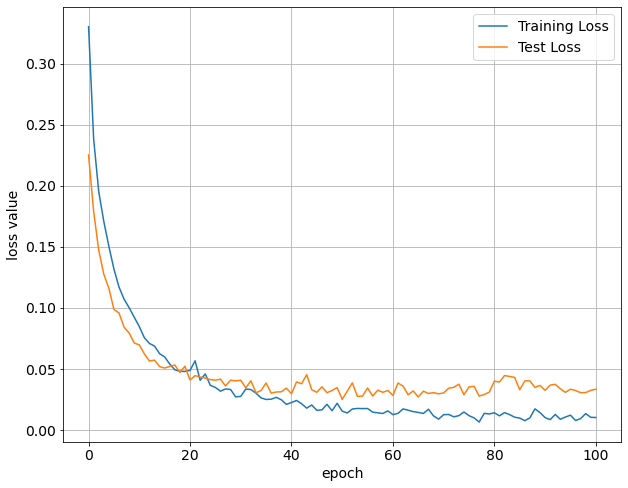

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 8)
rcParams['font.size'] = 14

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Test Loss")
plt.legend()
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.show()

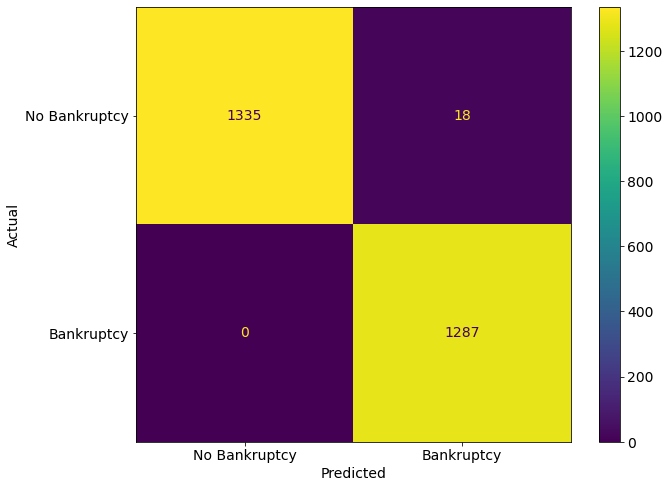

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ann_predictions = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, ann_predictions)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['No Bankruptcy', 'Bankruptcy'])
cmd_obj.plot()
cmd_obj.ax_.set(title='', xlabel='Predicted', ylabel='Actual')
plt.show()

In [ ]:
print (model.predict(X_test)[:, 0])

[9.9995041e-01 0.0000000e+00 9.9922323e-01 ... 9.9902618e-01 9.9626696e-01
 4.5706706e-32]



## Neural Network to Recognize Handwritten Digits

* Visual pattern recognition is an hard task.
  * It becomes apparent if you attempt to write a computer program to recognize digits like those below

<img src="https://drive.google.com/uc?id=1GDYJVbHF6sMgcW-siKPchbTQhpKG8TgL">

* "A 9 has a loop at the top, and a vertical stroke in the bottom right" turns out to be not so simple to express algorithmically. 

* NN approach the problem in a different way since they take a large number of handwritten digits and then develop a system which can learn from those. 
  * By increasing the number of training examples, the network can learn more and more about handwriting, and improve its accuracy. 
  * **NN are not capable of extrapolating, hence they won't recongnize a digit with a style not included in the training sample !!!**).

#### Example
* In this example we will use the sample provided with the $\tt{mnist}$ module.

* Program based on different kind of NN, specifically designed for image/pattern recognition, the Convolutional Neural Network (CNN). 
* Each layer (*convolutional layers*) works by applying on top of an image a series of filters that works as edge detectors. 
  * With them the CNN classifies images according to their relevant features.
  * Stacking many layers together allows to learn both low (e.g. lines) and high (more abstract) level features.

<img src="https://drive.google.com/uc?id=17qQOtzCLzqAxZ6uTs1pgvKU_oS7pcjkG" width="600">

<img src="https://drive.google.com/uc?id=1CPwx1zMEk2Dj7NNdXeXnlFLjEvldKZVj">

* CNN output won't be a single number but rather a list containing the probabilties that an image belonged to each class.


In [ ]:
!pip install mnist

In [ ]:
# NN to recognize digits
import numpy as np, mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

train_images = mnist.train_images() 
train_labels = mnist.train_labels() 

model = Sequential()
model.add(Conv2D(8, kernel_size=3, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(train_images, to_categorical(train_labels), epochs=5, verbose=1)

# to_categorical
#0 -> 1000000000
#1 -> 0100000000
#2 -> 0010000000
#3 -> 0001000000
#4 ->
#5 ->

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 1.7713
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3714
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2726
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2315
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2014


<img src="https://drive.google.com/uc?id=1eWzGaq-m5H9nwyw_IwXCvLFGq5EHDHH1">

In [ ]:
# test image CNN
test_images = mnist.test_images()
test_labels = mnist.test_labels()

predictions = model.predict(test_images[:10])

print ("Tesing on MNIST digits...")
print("Predicted: ", np.argmax(predictions, axis=1)) 
print("Truth:", test_labels[:10])

Tesing on MNIST digits...
Predicted:  [7 2 1 0 4 1 4 9 6 9]
Truth: [7 2 1 0 4 1 4 9 5 9]


* Since the last but one digit has lower probability let's check the returned list to see which other number have non-zero probability.

In [ ]:
print("9th digit:", ["dig {}: {:.4f}".format(i, p) for i, p in enumerate(predictions[-2])])

9th digit: ['dig 0: 0.0000', 'dig 1: 0.0000', 'dig 2: 0.0000', 'dig 3: 0.0000', 'dig 4: 0.0000', 'dig 5: 0.2899', 'dig 6: 0.7101', 'dig 7: 0.0000', 'dig 8: 0.0000', 'dig 9: 0.0000']


### Technical Analysis

* *Technical analysis* is a discipline for forecasting the direction of prices through the study of past market data (primarily price and volume).
* The analyst looks for particular patterns in the price time series that are **believed** to develop in predictable ways to take profit of it.

<img src="https://drive.google.com/uc?id=16TnvlNEZgDWYxz2SMrFB8rkOjYeOGWeK" width=400>
<img src="https://drive.google.com/uc?id=1B9nSrIgPjdhyjzXF1DZtVyArQc5sKYCr" width=400>

* We develop a CNN capable of classifying features in time series to be used in a technical analysis.

* I have generated myself the training set simulating 21600 time series (*To make the training easier the features have been exagerated*)
  * 1/3 with head and shoulder patter;
  * 1/3 with triangle pattern;
  * 1/3 with no pattern). 

<img src="https://drive.google.com/uc?id=1sa-x59Hic1tb6uLP1PgtXaz60Du9v8Yn" width=300>
<img src="https://drive.google.com/uc?id=1VUHQeHfTeV-PoAD-gozvvP8n9C1swGoZ" width=300>
<img src="https://drive.google.com/uc?id=1etWFoPvx5RKuL-Nv5XWNM2vxeiSipV_1" width=300>

In [ ]:
# do not run too long
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical

train_labels = np.load("/content/drive/MyDrive/finance_course/2021/lesson9/training_techana_labels.npy")
train_images = np.load("/content/drive/MyDrive/finance_course/2021/lesson9/training_techana_images.npy")

model = Sequential()
model.add(Conv1D(filters=80, kernel_size=20, 
                              activation='relu', input_shape=(101, 1)))
model.add(Conv1D(filters=80, kernel_size=15, activation='relu')) 
model.add(MaxPooling1D(3))
model.add(Conv1D(filters=100, kernel_size=10, activation='relu'))
model.add(Conv1D(filters=100, kernel_size=5, activation='relu'))
model.add(GlobalAveragePooling1D(3))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(train_images, to_categorical(train_labels), epochs=80)

Epoch 1/80
675/675 [==============================] - 26s 38ms/step - loss: 0.6750
Epoch 2/80
675/675 [==============================] - 26s 38ms/step - loss: 0.5194
Epoch 3/80
675/675 [==============================] - 26s 39ms/step - loss: 0.4578
Epoch 4/80
675/675 [==============================] - 26s 38ms/step - loss: 0.4025
Epoch 5/80
675/675 [==============================] - 26s 38ms/step - loss: 0.3508
Epoch 6/80
675/675 [==============================] - 26s 38ms/step - loss: 0.2864
Epoch 7/80
675/675 [==============================] - 26s 39ms/step - loss: 0.2577
Epoch 8/80
675/675 [==============================] - 26s 38ms/step - loss: 0.2226
Epoch 9/80
675/675 [==============================] - 26s 38ms/step - loss: 0.2168
Epoch 10/80
675/675 [==============================] - 26s 38ms/step - loss: 0.2016
Epoch 11/80
675/675 [==============================] - 26s 38ms/step - loss: 0.1990
Epoch 12/80
675/675 [==============================] - 26s 38ms/step - loss: 0.1885
E

* To check the perfomance a time series is analyzed in "real-time":
  * the goal is to check **when** the neural network is capable of predicting the incoming pattern (the sooner the better).

* The real-time simulation is done by presenting to the CNN sliding time windows. 
  * At $t_1$ used as input the time series points between $[0, 80]$;
  * at $t_2$  points between $[1, 81]$;
  * at $t_3$ $[2, 82]$... 

<img src="https://drive.google.com/uc?id=1i9ppRonW0RSskFf3wRwVZQxIC7X4nv6w">

In [ ]:
test_images = np.load("/content/drive/MyDrive/finance_course/2021/lesson9/testing_techana_frames.npy")
#trainer.loadModel("techana")

predictions = model.predict(test_images)
for i in range(len(predictions)):
    print (np.argmax(predictions[i]), ["{:.3f}".format(p) for p in predictions[i]])

0 ['0.557', '0.000', '0.443']
0 ['0.560', '0.000', '0.440']
0 ['1.000', '0.000', '0.000']
0 ['1.000', '0.000', '0.000']
0 ['0.975', '0.025', '0.000']
1 ['0.007', '0.993', '0.000']
1 ['0.000', '1.000', '0.000']
1 ['0.000', '1.000', '0.000']
1 ['0.000', '1.000', '0.000']
1 ['0.000', '1.000', '0.000']


* So at the 5th sample the CNN start recognizing the *head and shoulder* pattern in the price evolution.

# Unsupervised Learning

* Unsupervised learning is a type of machine learning in which the algorithm is not provided with any pre-assigned labels or scores for the training data.
* As a result, unsupervised learning algorithms must first self-discover any naturally occurring patterns in that training data set. 
  * **clustering**: where the algorithm automatically groups its training examples into categories with similar features;
  * **principal component analysis** where the algorithm finds ways to compress the training data set by identifying which features are most useful for discriminating between different training examples, and discarding the rest. 

## k-Means Algorithm

* k-means clustering aims to partition (split) $n$ observations into $k$ clusters in which each point belongs to the cluster with the nearest mean (cluster centers or cluster centroid). 
  * Given observations $(x_1, x_2, \ldots, x_n)$ the algorithm divides the $n$ observations into $k$ $(\leq n)$ sets $S = \{S_1, S_2, \ldots, S_k\}$  to minimize the within-cluster sum of squares (WCSS) (i.e. variance). 

#### Example
* Cluster SP500 stocks using historical returns and volatilities.
  * Input dataset: [k_mean.csv](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/k_mean.csv), consists of the daily closing price series within the interval 2018-09-20, 2021-09-20.
  * The goal is to find similarities amongst companies. To do this, the k-means clustering algorithm will produce labels that assign each company to different clusters.


* First load the inputs and produce a new DataFrame with annualized returns and volatilities for each stock. 

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/k_mean.csv", index_col='Date')

returns = df.pct_change().mean() * 252
std = df.pct_change().std() * np.sqrt(252)

ret_var = pd.concat([returns, std], axis = 1).dropna()
ret_var.columns = ["Returns","Standard Deviation"]
print (ret_var.head())

       Returns  Standard Deviation
MMM  -0.188903            0.261649
ABT   0.235801            0.232519
ABBV -0.159596            0.304667
ABMD -0.543486            0.526830
ACN   0.152511            0.212579


#### Elbow Curve

* To determine the optimal number of clusters $k$ for our dataset, fit different models of the k-means algorithm while varying the parameter $k$ (e.g. in range [2, 14]). 
  * For each model calculate the Sum Squared Error (SSE) by using the $\texttt{.inertia__}$ method
    * inertia tells how far away the points within a cluster are; 
    * the smaller the inertia value the better.



* Each pair of values ($k$, SSE) will construct the **Elbow Curve** which can be used to determine the optimal value for $k$. 

* Using the "elbow" of a curve as a cutoff point is a common heuristic in mathematical optimization
  * choose a point where diminishing returns are no longer worth the additional cost. 
  * In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
  * Increasing the number of clusters will naturally improve the fit but at some point too many clusters causes over-fitting (start sub-dividing "real" clusters). 
* In practice there may not be a sharp elbow, and as a heuristic method, such an "elbow" cannot always be unambiguously identified.

In [ ]:
from sklearn.cluster import KMeans

X =  ret_var.values 
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
  
    sse.append(kmeans.inertia_) 

<img src="https://drive.google.com/uc?id=1UCj2T2iDthU9oCBiTFihMpwPcGFi7uFN">

* The resulting graph shows that the optimal value of $k$ is 5.

In [ ]:
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

<img src="https://drive.google.com/uc?id=1nASwJdewartvCjY7LYBotS9ilgI-Z8AN">

* Note the outlier on the upper right side of the graph. 
  * This outlier form its own cluster. 
  * To improve categorization  remove that point and fit the model another time.
  * This is done by finding the stock with the highest standard deviation value and dropping the corresponding columnn.

In [ ]:
stdOrder = ret_var.sort_values('Standard Deviation', ascending=False)
first_symbol = stdOrder.index[0]
ret_var.drop(first_symbol, inplace=True)

In [ ]:
X = ret_var.values
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

<img src="https://drive.google.com/uc?id=1Tkza6qmZPrJYDDdgHDwLjwjRLKJPxtoV">

* Finally assign to each stock its correspondent cluster label (1, 2, 3, 4, and 5). 
* Having that information could help in creating a diversified portfolio in the long term, between stocks from different clusters.

In [ ]:
stocks = pd.DataFrame(ret_var.index) # the dataframe structure allow concatenation
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
stockClusters.columns = ['Symbol','Cluster']


In [ ]:
print (stockClusters.loc[stockClusters['Cluster'] == 0, 'Symbol'])

1       ABT
4       ACN
9       AES
12      APD
13     AKAM
       ... 
487     WHR
489    WLTW
491     XEL
494     YUM
495    ZBRA
Name: Symbol, Length: 144, dtype: object


### Natual Language Processing

* K-means algorithmm can also be used in Natural Language Processing (NLP).
  * NLP is an AI subfield concerned with the analysis of large amounts of natural language data.

* In there words (or sentences) are transformed into a set of numbers which then can be clustered together with k-means methods for a **sentiment analysis**.